# KIC 9651065

In [1]:
%run setup.py

In [2]:
lc_sap = lk.search_lightcurvefile('KIC 9651065', mission='Kepler').download_all().SAP_FLUX.stitch().remove_nans()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


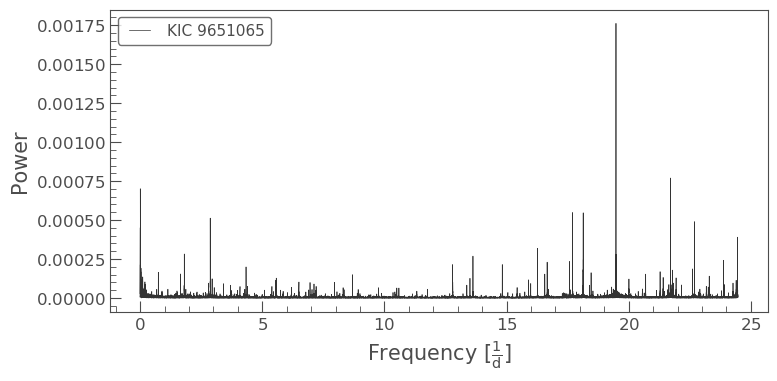

In [3]:
lc_sap.to_periodogram().plot()

In [4]:
# t, y = np.loadtxt('../lc/9651065_lc.txt', usecols=(0,1)).T

# from maelstrom.utils import amplitude_spectrum


# from scipy.ndimage import gaussian_filter
# from maelstrom.utils import amplitude_spectrum
# y_low = gaussian_filter(y,1.8) * 0.01*np.random.normal(loc=0, size=len(y))
# y_high = y - y_low

# plt.plot(*amplitude_spectrum(t, y_low), alpha=0.5)
# plt.plot(*amplitude_spectrum(t, y), alpha=0.5)

t, y = lc_sap.time, lc_sap.flux

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc47c7dc9e8>,
      dtype=object)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


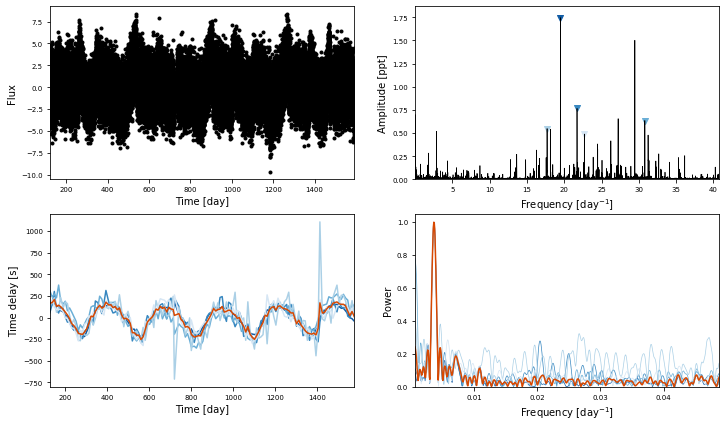

In [5]:
ms = Maelstrom(t, y, max_peaks=5, fmin=5, fmax=48)
ms.first_look()

In [6]:
period_guess = 300
a_guess = 200

time, flux = ms.time, ms.flux
freq = ms.freq
weights = ms.get_weights(norm=False)

In [7]:
ms.setup_orbit_model(period=period_guess)
# opt = ms.optimize()

In [8]:
pb1 = ms.pin_orbit_model()

In [9]:
opt = pb1.optimize()

optimizing logp for variables: [PB1_mean]
5it [00:00, 20.54it/s, logp=-1.371779e+05]
message: Optimization terminated successfully.
logp: -137177.9127290654 -> -137177.90481511469
optimizing logp for variables: [PB1_logs_lc]
13it [00:00, 18.64it/s, logp=-1.207493e+05]
message: Optimization terminated successfully.
logp: -137177.90481511469 -> -120749.33878875255
optimizing logp for variables: [PB1_omega, PB1_eccen]
122it [00:07, 15.76it/s, logp=-1.183623e+05]
message: Desired error not necessarily achieved due to precision loss.
logp: -120749.33878875255 -> -118362.34215137259
optimizing logp for variables: [PB1_phi]
90it [00:05, 15.29it/s, logp=-1.183413e+05]
message: Desired error not necessarily achieved due to precision loss.
logp: -118362.34215137259 -> -118341.25912369344
optimizing logp for variables: [PB1_lognu]
85it [00:05, 16.39it/s, logp=-1.183393e+05]
message: Desired error not necessarily achieved due to precision loss.
logp: -118341.25912369344 -> -118339.27329825441
opti

In [10]:
opt

{'PB1_logP_interval__': array(1.15586412),
 'PB1_phi_angle__': array([2.23279096, 3.87493692]),
 'PB1_logs_lc': array(0.39205064),
 'PB1_logasini_interval__': array(1.13146537),
 'PB1_mean': array(0.00033852),
 'PB1_lognu': array([2.96926913, 3.07787134, 3.42757625, 2.87353174, 3.1221136 ]),
 'PB1_omega_angle__': array([ 3.72076761, -2.48125517]),
 'PB1_eccen_interval__': array(0.00649351),
 'PB1_logP': array(5.60708903),
 'PB1_period': array(272.35027897),
 'PB1_phi': array(0.52274578),
 'PB1_logasini': array(5.2230175),
 'PB1_asini': array(185.49306595),
 'PB1_nu': array([19.47767876, 21.71213545, 30.80189609, 17.69941762, 22.69429561]),
 'PB1_omega': array(2.15893724),
 'PB1_eccen': array(0.45146103)}

In [11]:
# with pb1:
#     trace = pm.load_trace('traces/9651065_FINAL_VERSION2/')

In [12]:
with pb1:
    trace = pm.sample(
        tune=1000,
        draws=1000,
        start=opt,
        chains=2,
        step=xo.get_dense_nuts_step(target_accept=0.9),
    )

Multiprocess sampling (2 chains in 4 jobs)
NUTS: [PB1_eccen, PB1_omega, PB1_lognu, PB1_mean, PB1_logasini, PB1_logs_lc, PB1_phi, PB1_logP]
Sampling 2 chains: 100%|██████████| 4000/4000 [2:06:59<00:00,  2.33draws/s]  


In [13]:
pm.save_trace(trace, 'trace/REFEREE_9651065_SAP_FLUX')

'trace/REFEREE_9651065_SAP_FLUX'

In [17]:
with pb1:
    trace = pm.load_trace('trace/REFEREE_9651065_SAP_FLUX')

In [18]:
trace

<MultiTrace: 2 chains, 1000 iterations, 16 variables>

In [19]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
PB1_logs_lc,0.392108,2.753005e-03,6.021877e-05,0.386573,0.397235,1989.422852,1.000210
PB1_mean,0.000343,5.703470e-03,1.318591e-04,-0.010901,0.011279,2199.449623,0.999875
PB1_lognu__0,2.969269,8.881179e-08,1.677189e-09,2.969269,2.969269,2291.112323,0.999757
PB1_lognu__1,3.077871,1.846109e-07,4.337641e-09,3.077871,3.077872,1859.008886,1.001432
PB1_lognu__2,3.427576,1.538619e-07,3.070829e-09,3.427576,3.427577,2430.763054,1.000123
PB1_lognu__3,2.873532,3.115028e-07,5.830205e-09,2.873531,2.873532,2062.261100,0.999501
PB1_lognu__4,3.122114,2.801647e-07,6.022402e-09,3.122113,3.122114,2344.140927,0.999507
PB1_logP,5.607057,2.058703e-03,4.109573e-05,5.602697,5.610573,2143.988061,1.000649
PB1_period,272.342116,5.606977e-01,1.119582e-02,271.156759,273.300716,2143.787005,1.000647
PB1_phi,0.522585,8.403814e-02,2.239660e-03,0.357108,0.689714,1262.167868,1.000233


# Synthetic system

In [2]:
"""Generate colored noise."""

from numpy import sqrt, newaxis
from numpy.fft import irfft, rfftfreq
from numpy.random import normal
from numpy import sum as npsum


def powerlaw_psd_gaussian(exponent, size, fmin=0):
    """Gaussian (1/f)**beta noise.
    Based on the algorithm in:
    Timmer, J. and Koenig, M.:
    On generating power law noise.
    Astron. Astrophys. 300, 707-710 (1995)
    Normalised to unit variance
    Parameters:
    -----------
    exponent : float
        The power-spectrum of the generated noise is proportional to
        S(f) = (1 / f)**beta
        flicker / pink noise:   exponent beta = 1
        brown noise:            exponent beta = 2
        Furthermore, the autocorrelation decays proportional to lag**-gamma
        with gamma = 1 - beta for 0 < beta < 1.
        There may be finite-size issues for beta close to one.
    shape : int or iterable
        The output has the given shape, and the desired power spectrum in
        the last coordinate. That is, the last dimension is taken as time,
        and all other components are independent.
    fmin : float, optional
        Low-frequency cutoff.
        Default: 0 corresponds to original paper. It is not actually
        zero, but 1/samples.
    Returns
    -------
    out : array
        The samples.
    Examples:
    ---------
    # generate 1/f noise == pink noise == flicker noise
    >>> import colorednoise as cn
    >>> y = cn.powerlaw_psd_gaussian(1, 5)
    """
    
    # Make sure size is a list so we can iterate it and assign to it.
    try:
        size = list(size)
    except TypeError:
        size = [size]
    
    # The number of samples in each time series
    samples = size[-1]
    
    # Calculate Frequencies (we asume a sample rate of one)
    # Use fft functions for real output (-> hermitian spectrum)
    f = rfftfreq(samples)
    
    # Build scaling factors for all frequencies
    s_scale = f
    fmin = max(fmin, 1./samples) # Low frequency cutoff
    ix   = npsum(s_scale < fmin)   # Index of the cutoff
    if ix and ix < len(s_scale):
        s_scale[:ix] = s_scale[ix]
    s_scale = s_scale**(-exponent/2.)
    
    # Calculate theoretical output standard deviation from scaling
    w      = s_scale[1:].copy()
    w[-1] *= (1 + (samples % 2)) / 2. # correct f = +-0.5
    sigma = 2 * sqrt(npsum(w**2)) / samples
    
    # Adjust size to generate one Fourier component per frequency
    size[-1] = len(f)

    # Add empty dimension(s) to broadcast s_scale along last
    # dimension of generated random power + phase (below)
    dims_to_add = len(size) - 1
    s_scale     = s_scale[(newaxis,) * dims_to_add + (Ellipsis,)]
    
    # Generate scaled random power + phase
    sr = normal(scale=s_scale, size=size)
    si = normal(scale=s_scale, size=size)
    
    # If the signal length is even, frequencies +/- 0.5 are equal
    # so the coefficient must be real.
    if not (samples % 2): si[...,-1] = 0
    
    # Regardless of signal length, the DC component must be real
    si[...,0] = 0
    
    # Combine power + corrected phase to Fourier components
    s  = sr + 1J * si
    
    # Transform to real time series & scale to unit variance
    y = irfft(s, n=samples, axis=-1) / sigma
    
    return y

In [3]:
from maelstrom.synthetic import SyntheticBinary
from maelstrom.utils import amplitude_spectrum

In [4]:
# Fixed parameters
period_t = 10
asini_t = 100
varpi_t = 0.
tref_t = 0.
freqs = np.array([20, 50])
amps = np.array([0.5, 0.2])
eccen_t = 0.5

time = np.arange(0, 3*period_t, 1.0 / (24 * 30))

In [5]:
lc = SyntheticBinary(time, freqs, amps, period_t, eccen_t, asini_t, varpi_t, tref_t)
lc.add_noise(snr=1000)

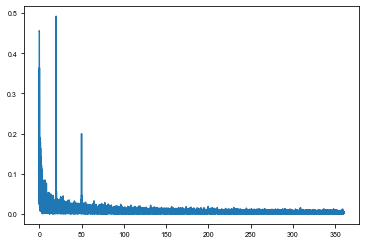

In [6]:
rednoise = powerlaw_psd_gaussian(1, len(lc.time))
plt.plot(*amplitude_spectrum(lc.time, lc.flux + rednoise))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1291b8f90>,
      dtype=object)

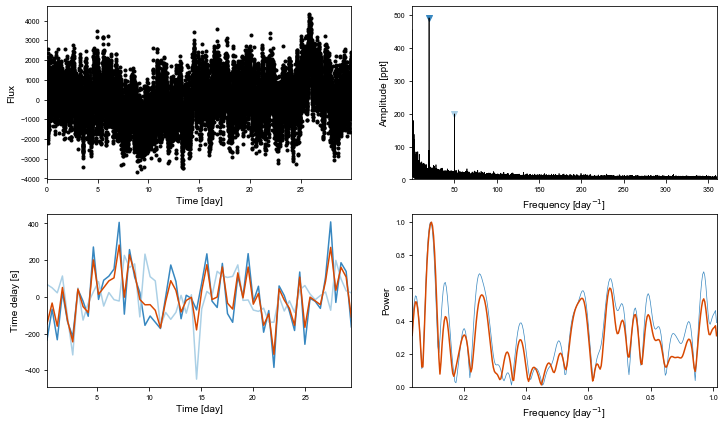

In [7]:
ms = Maelstrom(lc.time, lc.flux + rednoise, max_peaks=2, fmin=5, fmax=100)
ms.first_look()

In [8]:
ms.setup_orbit_model(period=period_t)
# opt = ms.optimize()

In [9]:
pb1 = ms.pin_orbit_model()

In [10]:
opt = pb1.optimize()

optimizing logp for variables: [PB1_mean]
4it [00:00, 40.42it/s, logp=-1.085502e+10]
message: Optimization terminated successfully.
logp: -10855019299.452486 -> -10855019299.443924
optimizing logp for variables: [PB1_logs_lc]
196it [00:02, 95.32it/s, logp=-1.799210e+05]
message: Desired error not necessarily achieved due to precision loss.
logp: -10855019299.443924 -> -179921.0393744298
optimizing logp for variables: [PB1_omega, PB1_eccen]
58it [00:00, 73.37it/s, logp=-1.798986e+05]
message: Desired error not necessarily achieved due to precision loss.
logp: -179921.0393744298 -> -179898.61485412018
optimizing logp for variables: [PB1_phi]
11it [00:00, 59.02it/s, logp=-1.798782e+05]
message: Optimization terminated successfully.
logp: -179898.61485412018 -> -179878.1547518535
optimizing logp for variables: [PB1_lognu]
100it [00:01, 89.44it/s, logp=-1.798770e+05]
message: Desired error not necessarily achieved due to precision loss.
logp: -179878.1547518535 -> -179876.95591920151
optimi

In [12]:
opt

{'PB1_logP_interval__': array(0.74912112),
 'PB1_phi_angle__': array([-3.33323056,  2.98153796]),
 'PB1_logs_lc': array(6.91015421),
 'PB1_logasini_interval__': array(0.74760208),
 'PB1_mean': array(1.17485875e-05),
 'PB1_lognu': array([2.99577184, 3.91202852]),
 'PB1_omega_angle__': array([-2.96498131,  3.34796845]),
 'PB1_eccen_interval__': array(0.91459598),
 'PB1_logP': array(2.30933794),
 'PB1_period': array(10.06775696),
 'PB1_phi': array(-0.84103435),
 'PB1_logasini': array(4.68798943),
 'PB1_asini': array(108.63454228),
 'PB1_nu': array([20.00079129, 50.00027557]),
 'PB1_omega': array(-0.72480552),
 'PB1_eccen': array(0.64254575)}

In [30]:
with pb1:
    trace = pm.sample(
        tune=1000,
        draws=1000,
        start=opt,
        chains=2,
        step=xo.get_dense_nuts_step(target_accept=0.9),
    )

Multiprocess sampling (2 chains in 4 jobs)
NUTS: [PB1_eccen, PB1_omega, PB1_lognu, PB1_mean, PB1_logasini, PB1_logs_lc, PB1_phi, PB1_logP]
Sampling 2 chains: 100%|██████████| 4000/4000 [25:32<00:00,  5.33draws/s] 
The number of effective samples is smaller than 25% for some parameters.


In [31]:
pm.save_trace(trace, 'trace/REFEREE_SYNTHETIC_RED_NOISE')

'trace/REFEREE_SYNTHETIC_RED_NOISE'

In [32]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
PB1_logs_lc,6.771290,0.004617,9.791664e-05,6.762018,6.780097,2442.487181,0.999607
PB1_mean,0.024595,0.996610,2.040241e-02,-1.993183,1.934690,1829.677687,0.999962
PB1_lognu__0,2.995722,0.000016,3.381632e-07,2.995692,2.995754,2061.013677,1.000291
PB1_lognu__1,3.911997,0.000015,3.336149e-07,3.911968,3.912027,2108.580644,0.999505
PB1_logP,2.296946,0.018975,5.486085e-04,2.262800,2.334579,1147.429392,0.999501
PB1_period,9.945555,0.188846,5.460109e-03,9.609960,10.325108,1149.660423,0.999501
PB1_phi,-1.964795,0.607469,2.206357e-02,-2.834188,-1.140881,543.271349,0.999720
PB1_logasini,4.848183,0.169623,3.787798e-03,4.516731,5.187152,1537.471162,1.000309
PB1_asini,129.349772,22.031809,4.919591e-01,88.357786,173.676322,1483.933635,1.000329
PB1_nu__0,19.999796,0.000316,6.763192e-06,19.999199,20.000437,2061.013014,1.000291


# With GP

In [13]:
from maelstrom import PB1Model

In [14]:
pb1 = PB1Model(ms.time, ms.flux, ms.freq)

In [18]:
pb1.init_orbit(opt['PB1_period'], opt['PB1_asini'], with_gp=True)

In [20]:
opt = pb1.optimize()
opt

optimizing logp for variables: [PB1_mean]
2it [00:00,  2.10it/s, logp=-3.273839e+12]
message: Optimization terminated successfully.
logp: -3273839173317.154 -> -3273839173317.154
optimizing logp for variables: [PB1_logs_lc]
25it [00:00, 45.99it/s, logp=-3.240680e+05]
message: Optimization terminated successfully.
logp: -3273839173317.154 -> -324067.9864458737
optimizing logp for variables: [PB1_logw0, PB1_logpower]
145it [00:02, 49.37it/s, logp=-3.204018e+05]
message: Desired error not necessarily achieved due to precision loss.
logp: -324067.9864458737 -> -320401.82256698405
optimizing logp for variables: [PB1_omega, PB1_eccen]
16it [00:00, 31.83it/s, logp=-3.203769e+05]
message: Optimization terminated successfully.
logp: -320401.82256698405 -> -320376.8937663313
optimizing logp for variables: [PB1_phi]
14it [00:00, 33.37it/s, logp=-3.203564e+05]
message: Optimization terminated successfully.
logp: -320376.8937663313 -> -320356.4361719417
optimizing logp for variables: [PB1_lognu]
14

{'PB1_logP_interval__': array(0.67324687),
 'PB1_phi_angle__': array([4.23819237, 1.42748921]),
 'PB1_logs_lc': array(13.08409622),
 'PB1_logasini_interval__': array(0.74952646),
 'PB1_mean': array(1.45566306e-09),
 'PB1_lognu': array([2.99577253, 3.91202482]),
 'PB1_omega_angle__': array([2.35895619, 3.79938491]),
 'PB1_eccen_interval__': array(0.5973987),
 'PB1_logw0_interval__': array(5.57673918),
 'PB1_logpower': array(40.60989863),
 'PB1_logP': array(2.25234362),
 'PB1_period': array(9.50999756),
 'PB1_phi': array(1.24591503),
 'PB1_logasini': array(4.69088743),
 'PB1_asini': array(108.94982204),
 'PB1_nu': array([20.00080508, 50.00009075]),
 'PB1_omega': array(0.55563001),
 'PB1_eccen': array(0.58055485),
 'PB1_logw0': array(1.12997915),
 'PB1_logS0': array(36.08998204)}

In [21]:
with pb1:
    trace = pm.sample(
        tune=1000,
        draws=1000,
        start=opt,
        chains=2,
        step=xo.get_dense_nuts_step(target_accept=0.9),
    )

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [PB1_logpower, PB1_logw0, PB1_eccen, PB1_omega, PB1_lognu, PB1_mean, PB1_logasini, PB1_logs_lc, PB1_phi, PB1_logP]
Sampling 2 chains, 1 divergences: 100%|██████████| 4000/4000 [27:08<00:00,  2.46draws/s] 
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [22]:
pm.save_trace(trace, 'trace/REFEREE_SYNTHETIC_RED_NOISE_WITH_GP')

'trace/REFEREE_SYNTHETIC_RED_NOISE_WITH_GP'

In [23]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
PB1_logs_lc,13.084,0.006,13.072,13.095,0.000,0.000,3004.0,3004.0,2981.0,1281.0,1.0
PB1_mean,0.003,1.007,-1.979,1.836,0.020,0.027,2522.0,716.0,2526.0,1310.0,1.0
PB1_lognu[0],2.996,0.000,2.996,2.996,0.000,0.000,2190.0,2190.0,2202.0,1382.0,1.0
PB1_lognu[1],3.912,0.000,3.912,3.912,0.000,0.000,2519.0,2519.0,2502.0,1520.0,1.0
PB1_logpower,40.613,0.071,40.481,40.745,0.001,0.001,3218.0,3218.0,3154.0,1383.0,1.0
PB1_logP,2.259,0.018,2.227,2.292,0.001,0.000,769.0,763.0,835.0,650.0,1.0
PB1_period,9.577,0.173,9.274,9.890,0.006,0.004,757.0,746.0,835.0,650.0,1.0
PB1_phi,0.884,0.792,-0.845,1.927,0.045,0.032,308.0,308.0,457.0,261.0,1.0
PB1_logasini,4.617,0.180,4.291,4.964,0.006,0.004,998.0,984.0,1045.0,1332.0,1.0
PB1_asini,102.936,19.653,69.433,138.663,0.641,0.459,941.0,916.0,1045.0,1332.0,1.0
